The objective is to develop a machine learning model that can predict the selling price of a used car based on its key features. The car market is highly dynamic, and multiple factors such as brand, year of manufacture, mileage, fuel type, transmission, and ownership history significantly influence the resale value of a vehicle. Buyers often find it difficult to estimate a fair price, while sellers want to maximize their return.

By building a predictive model, we aim to analyze historical data of used cars, extract patterns, and create an algorithm that can accurately estimate the expected price of a car given its features. This will help both customers and dealers in making data-driven decisions.

In [2]:
# importing the Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data collection and processing

In [3]:
# loading the data from csv file to pandas data frame
car_dataset=pd.read_csv('/content/car data.csv')

In [4]:
# inspecting the first five row of dataset
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
# checking the number of rows and colums
car_dataset.shape

(301, 9)

In [6]:
# getting some information about the dataset

car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
# also we can check null value with

car_dataset.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [8]:
# checking the distribution of categrorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


Encoding the Categorical Data

In [9]:
# encoding Fuel_Type column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding Seller_Type column

car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding Transmission column

car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)


/tmp/ipython-input-2127161579.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
/tmp/ipython-input-2127161579.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
/tmp/ipython-input-2127161579.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=Fa

In [10]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


spliting the data and target

In [11]:
X=car_dataset.drop(['Car_Name','Selling_Price'],axis=1)

#target feature is selling price
Y=car_dataset['Selling_Price']

In [12]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [13]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


Splitting data into traning and test data

In [14]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=2)

In [15]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape )

(270, 7) (31, 7) (270,) (31,)


Model tranining

In [16]:
# using Linear Regression

lin_reg_model=LinearRegression()

In [17]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

Model Evaluation

In [18]:
# predicting on training data
train_data_prediction=lin_reg_model.predict(X_train)

In [19]:
# R square Error
error_score=metrics.r2_score(Y_train,train_data_prediction)
print('R squared Error',error_score)

R squared Error 0.8799451660493711


Visulaizing the actual price and prediced price

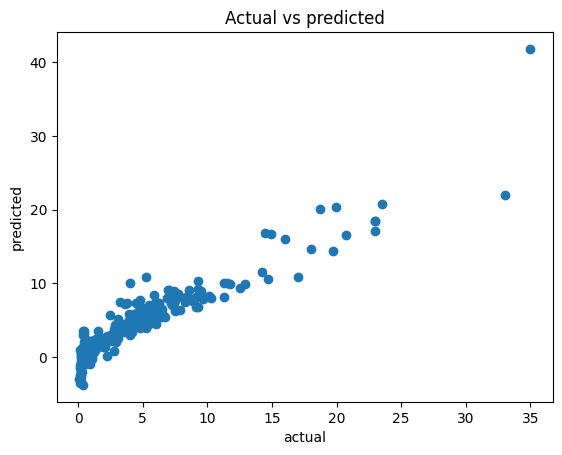

In [20]:
plt.scatter(Y_train,train_data_prediction)
plt.xlabel("actual")
plt.ylabel('predicted')
plt.title('Actual vs predicted')
plt.show()

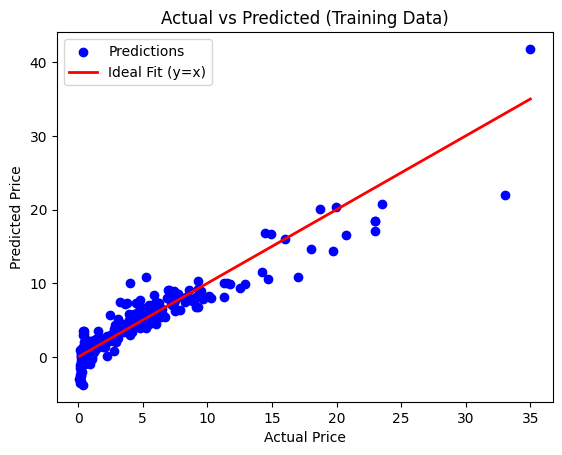

In [21]:
plt.scatter(Y_train, train_data_prediction, color="blue", label="Predictions")
plt.plot([Y_train.min(), Y_train.max()],
         [Y_train.min(), Y_train.max()],
         color="red", linewidth=2, label="Ideal Fit (y=x)")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted (Training Data)")
plt.legend()
plt.show()


In [22]:
# predicting the model with test data
test_data_prediction=lin_reg_model.predict(X_test)

In [23]:
# R square Error
error_score=metrics.r2_score(Y_test,test_data_prediction)
print('R squared Error',error_score)

R squared Error 0.8365766715027051


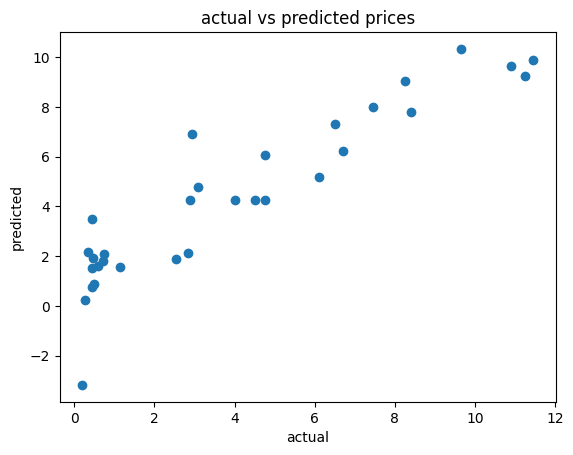

In [24]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("actual")
plt.ylabel("predicted")
plt.title("actual vs predicted prices")
plt.show()

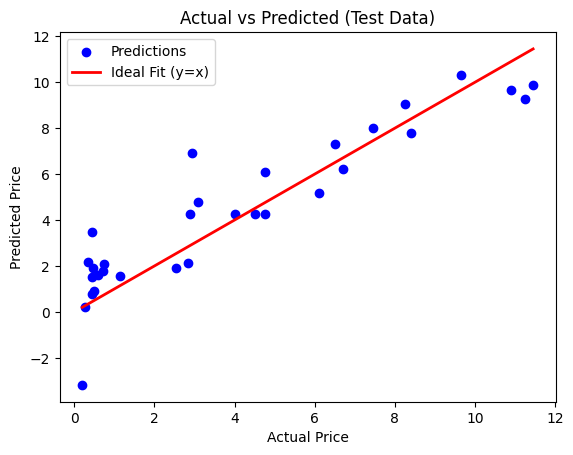

In [25]:
plt.scatter(Y_test, test_data_prediction, color="blue", label="Predictions")
plt.plot([Y_test.min(), Y_test.max()],
         [Y_test.min(), Y_test.max()],
         color="red", linewidth=2, label="Ideal Fit (y=x)")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted (Test Data)")
plt.legend()
plt.show()

Now traing model with lasso regression

In [26]:
#loading lasso regression model
lasso_reg_model=Lasso()

In [27]:
# fitting model with training dataset
lasso_reg_model.fit(X_train,Y_train)

Lasso()

In [28]:
# predicting on training data
X_train_prediction=lasso_reg_model.predict(X_train)

Evaluting model

In [29]:
# R square Error
error_score=metrics.r2_score(Y_train,X_train_prediction)
print('R squared Error',error_score)

R squared Error 0.8427856123435794


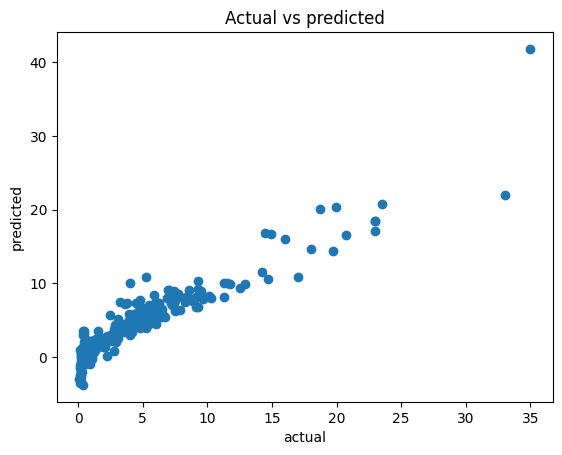

In [30]:
plt.scatter(Y_train,train_data_prediction)
plt.xlabel("actual")
plt.ylabel('predicted')
plt.title('Actual vs predicted')
plt.show()

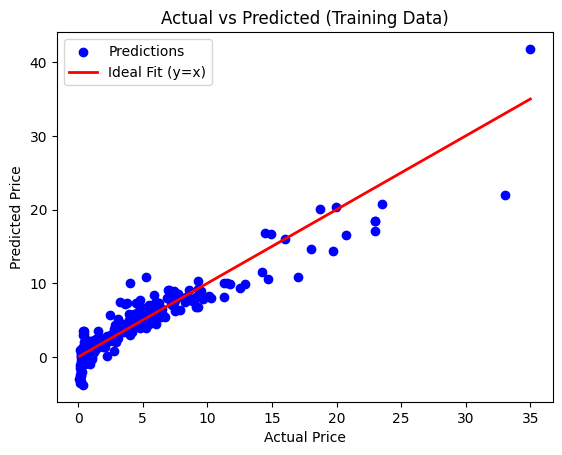

In [31]:
plt.scatter(Y_train, train_data_prediction, color="blue", label="Predictions")
plt.plot([Y_train.min(), Y_train.max()],
         [Y_train.min(), Y_train.max()],
         color="red", linewidth=2, label="Ideal Fit (y=x)")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted (Training Data)")
plt.legend()
plt.show()

working with test data

In [32]:
# predicting value for test data
test_data_prediction=lasso_reg_model.predict(X_test)


In [33]:
# R square Error
error_score=metrics.r2_score(Y_test,test_data_prediction)
print('R squared Error',error_score)

R squared Error 0.8709167941173195


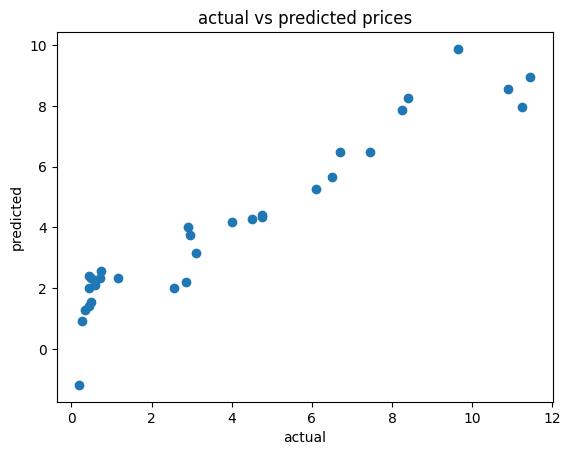

In [34]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("actual")
plt.ylabel("predicted")
plt.title("actual vs predicted prices")
plt.show()

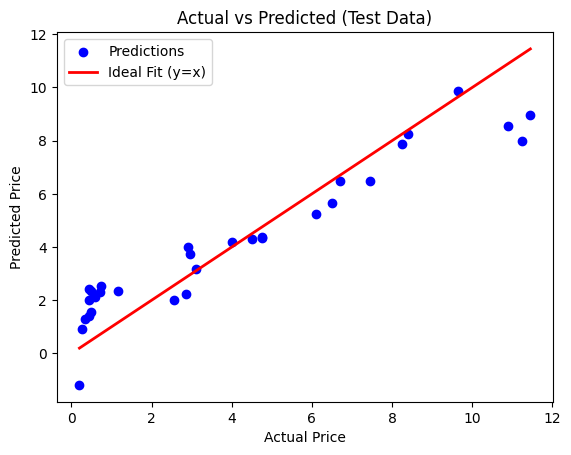

In [35]:
plt.scatter(Y_test, test_data_prediction, color="blue", label="Predictions")
plt.plot([Y_test.min(), Y_test.max()],
         [Y_test.min(), Y_test.max()],
         color="red", linewidth=2, label="Ideal Fit (y=x)")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted (Test Data)")
plt.legend()
plt.show()

Now making Predictive system

In [36]:
# ---- Taking user input ----
year = int(input("Enter the Year of purchase: "))
present_price = float(input("Enter the Present Price (in lakhs): "))
kms_driven = int(input("Enter the Kms Driven: "))
fuel_type = input("Enter Fuel Type (Petrol/Diesel/CNG): ")
seller_type = input("Enter Seller Type (Dealer/Individual): ")
transmission = input("Enter Transmission Type (Manual/Automatic): ")
owner = int(input("Enter number of previous owners (0/1/3): "))

# ---- Encoding categorical values (same mapping as training) ----
if fuel_type.lower() == 'petrol':
    fuel_type = 0
elif fuel_type.lower() == 'diesel':
    fuel_type = 1
else:
    fuel_type = 2

if seller_type.lower() == 'dealer':
    seller_type = 0
else:
    seller_type = 1

if transmission.lower() == 'manual':
    transmission = 0
else:
    transmission = 1

# ---- Prepare data for prediction ----
input_data = np.array([[year, present_price, kms_driven, fuel_type,
                        seller_type, transmission, owner]])

# ---- Make prediction ----
predicted_price = lasso_reg_model.predict(input_data)

# ---- Show result ----
print("\n✅ Predicted Selling Price of the car is: ₹", round(predicted_price[0], 2), "lakhs")


Enter the Year of purchase: 2014
Enter the Present Price (in lakhs): 5.59
Enter the Kms Driven: 27000
Enter Fuel Type (Petrol/Diesel/CNG): petrol
Enter Seller Type (Dealer/Individual): dealer
Enter Transmission Type (Manual/Automatic): manual
Enter number of previous owners (0/1/3): 0

✅ Predicted Selling Price of the car is: ₹ 3.83 lakhs


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
